In [ ]:
import splitfolders
splitfolders.ratio('/home/sdasgupta/project work/datasets/cyber_bullying', output="/home/sdasgupta/project work/datasets/cyber_bullying_split", seed=1337, ratio=(.8, 0.1,0.1)) 

In [ ]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))


In [ ]:
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
original_images = []
original_image_dir = '/home/sdasgupta/project work/datasets/Frames_new/Frames_non'

In [ ]:
for filename in os.listdir(original_image_dir):
    img = load_img(os.path.join(original_image_dir, filename))
    original_images.append(img)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" #if having multiple GPUs in the system 

#%%
#clear warnings and session

import warnings 
warnings.filterwarnings('ignore',category=FutureWarning) 
import tensorflow as tf
from tensorflow.keras import backend as K
K.clear_session()

#%%
#import other libraries

import struct
from tensorflow.keras.preprocessing.image import img_to_array
import statistics
#import keras_efficientnet_v2
import zlib
import time
import glob
import itertools
from itertools import cycle
from matplotlib import pyplot
import numpy as np
from numpy import sqrt, argmax, genfromtxt
from scipy import interp
from scipy.optimize import minimize
import pandas as pd
import math
import cv2
import statistics
import matplotlib.pyplot as plt
from vit_keras import vit, utils, visualize
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import VGG16, DenseNet121
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Input, Conv2D, Flatten, Concatenate, ZeroPadding2D, GlobalAveragePooling2D, Dense
from sklearn import metrics
from sklearn.utils import compute_class_weight
from sklearn.metrics import roc_auc_score, brier_score_loss
from sklearn.metrics import roc_curve, auc,  precision_recall_curve, average_precision_score, matthews_corrcoef
from sklearn.metrics import f1_score, cohen_kappa_score, precision_score, recall_score, classification_report, log_loss, confusion_matrix, accuracy_score 
from sklearn.utils import class_weight
import matplotlib.patches as mpatches
import seaborn as sns
import tensorflow_addons as tfa

2023-09-15 15:31:02.251132: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-15 15:31:02.287147: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-15 15:31:02.962069: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/sdasgupta/anaconda3/lib/python3.11/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode un

In [2]:
img_width, img_height = 224,224
train_data_dir = "/home/sdasgupta/project work/datasets/cyber_bullying_split/train"
test_data_dir = "/home/sdasgupta/project work/datasets/cyber_bullying_split/test"
validation_data_dir = "/home/sdasgupta/project work/datasets/cyber_bullying_split/validation"
epochs = 50 
batch_size = 32 
num_classes = 2 
input_shape = (img_width, img_height, 3)
model_input = Input(shape=input_shape)
print(model_input) 

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='nearest') 

test_datagen = ImageDataGenerator(
        rescale=1./255) 



In [4]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        seed = 42,
        batch_size = batch_size,
        shuffle = True,
        class_mode = 'categorical')

validation_generator = train_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        seed = 42,
        batch_size = batch_size,
        shuffle = False,
        class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size = (img_width, img_height),
        seed = 42,
        batch_size = batch_size,
        shuffle = False,
        class_mode = 'categorical')


Found 13500 images belonging to 2 classes.
Found 1687 images belonging to 2 classes.
Found 1688 images belonging to 2 classes.


In [5]:
nb_train_samples = len(train_generator.filenames)
nb_validation_samples = len(validation_generator.filenames)
nb_test_samples = len(test_generator.filenames)

In [6]:
print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

{'Frames_bully_augmented': 0, 'Frames_non_augmented': 1}
{'Frames_bully_augmented': 0, 'Frames_non_augmented': 1}
{'Frames_bully_augmented': 0, 'Frames_non_augmented': 1}


In [7]:
Y_test=test_generator.classes
print(Y_test.shape)
Y_test1=to_categorical(Y_test, 
                       num_classes=num_classes, 
                       dtype='float32')
print(Y_test1.shape)

(1688,)
(1688, 2)


In [8]:
train_classes = train_generator.classes
class_labels = np.unique(train_classes)
class_weights = compute_class_weight(class_weight="balanced", classes=class_labels, y=train_classes)
class_weights_dict = dict(zip(class_labels, class_weights))
print(class_weights_dict)

{0: 0.8876906891109942, 1: 1.1448439620081412}


In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model 
from keras.layers import GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, Dropout
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
base_model = VGG16( input_shape= (224, 224, 3),
                        weights= "imagenet",
                        include_top= False)

for layer in base_model.layers[:15]:
    layer.trainable=False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(num_classes, activation='softmax')(x)
modelvg = Model(inputs=base_model.inputs, outputs=predictions, name="VGG16_pretrained")
modelvg.summary()

2023-09-15 15:31:17.944343: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14760 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:19:00.0, compute capability: 7.5


Model: "VGG16_pretrained"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)  

In [10]:
filepath = '/home/sdasgupta/project work/weights' + modelvg.name +\
            '.{epoch:02d}-{val_accuracy:.4f}.h5' # path to the stored model
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', 
                             verbose=1, 
                             save_weights_only=False, 
                             save_best_only=True, 
                             mode='min', 
                             save_freq='epoch')
earlyStopping = EarlyStopping(monitor='val_loss', 
                              patience=5, 
                              verbose=1, 
                              mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=5,
                              verbose=1,
                              mode='min', 
                              min_lr=0.00001)
callbacks_list = [checkpoint, earlyStopping, reduce_lr]
t=time.time()

In [ ]:
my_strategy = tf.distribute.MirroredStrategy()


In [11]:
sgd = SGD(learning_rate=0.0001, 
          momentum=0.9)  
modelvg.compile(optimizer=sgd, 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])

In [12]:
train_generator.reset()
validation_generator.reset()

In [13]:
modelvg_history = modelvg.fit(train_generator, 
                          steps_per_epoch=nb_train_samples // batch_size,
                          epochs=epochs, 
                          validation_data=validation_generator,
                          callbacks=callbacks_list,
                          validation_steps=nb_validation_samples // batch_size, 
                          verbose=1)

Epoch 1/50


2023-09-15 15:31:32.620206: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-15 15:31:35.143374: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1fb69e30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-15 15:31:35.143422: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2023-09-15 15:31:35.164606: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:543] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  /usr/local/cuda-11.8
  /usr/local/cuda
  .
You can choose the search directory by setting xla_gpu_cuda_data_dir in HloModule's DebugOptions.  For most apps, setting the environment variable XLA_FLAGS=--

421/421 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.5748
Epoch 1: val_loss improved from inf to 0.63740, saving model to /home/sdasgupta/project work/weightsVGG16_pretrained.01-0.6562.h5
421/421 [==============================] - 143s 318ms/step - loss: 0.6917 - accuracy: 0.5748 - val_loss: 0.6374 - val_accuracy: 0.6562 - lr: 1.0000e-04
Epoch 2/50


/home/sdasgupta/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


421/421 [==============================] - ETA: 0s - loss: 0.6565 - accuracy: 0.6213
Epoch 2: val_loss improved from 0.63740 to 0.62566, saving model to /home/sdasgupta/project work/weightsVGG16_pretrained.02-0.6845.h5
421/421 [==============================] - 128s 304ms/step - loss: 0.6565 - accuracy: 0.6213 - val_loss: 0.6257 - val_accuracy: 0.6845 - lr: 1.0000e-04
Epoch 3/50
421/421 [==============================] - ETA: 0s - loss: 0.6314 - accuracy: 0.6567
Epoch 3: val_loss improved from 0.62566 to 0.61229, saving model to /home/sdasgupta/project work/weightsVGG16_pretrained.03-0.6839.h5
421/421 [==============================] - 129s 306ms/step - loss: 0.6314 - accuracy: 0.6567 - val_loss: 0.6123 - val_accuracy: 0.6839 - lr: 1.0000e-04
Epoch 4/50
421/421 [==============================] - ETA: 0s - loss: 0.6159 - accuracy: 0.6674
Epoch 4: val_loss improved from 0.61229 to 0.59071, saving model to /home/sdasgupta/project work/weightsVGG16_pretrained.04-0.7061.h5
421/421 [========

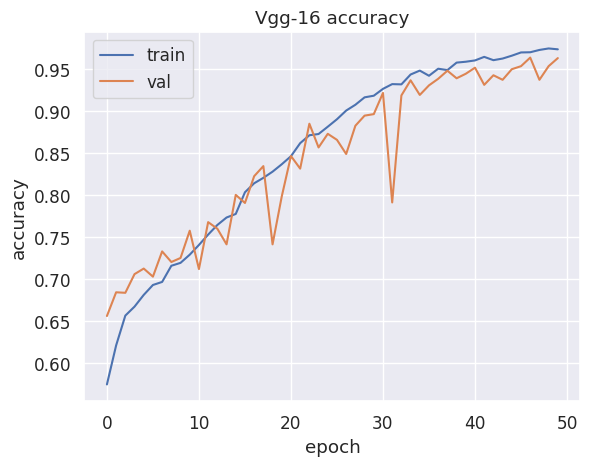

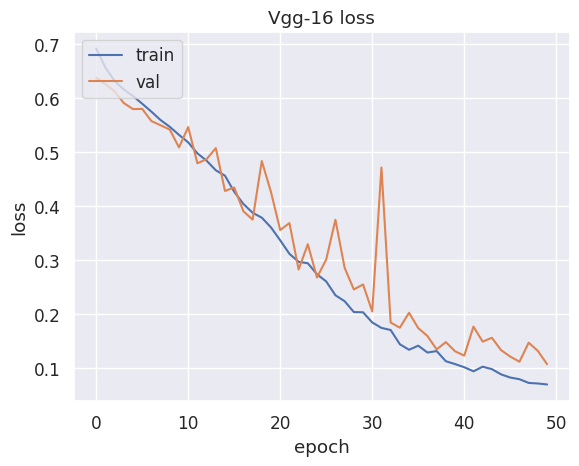

In [19]:
plt.plot(modelvg_history.history['accuracy'])
plt.plot(modelvg_history.history['val_accuracy'])
plt.title('Vgg-16 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("vgg_accuracy.png")
plt.show()

plt.plot(modelvg_history.history['loss'])
plt.plot(modelvg_history.history['val_loss'])
plt.title('Vgg-16 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("vgg_loss.png")
plt.show()

In [14]:
model = load_model('/home/sdasgupta/project work/weightsVGG16_pretrained.50-0.9633.h5', compile=False) # path to your stored model
model.summary()

Model: "VGG16_pretrained"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)  

In [15]:
test_generator.reset() 
custom_y_pred = model.predict(test_generator,
                                    nb_test_samples // batch_size, 
                                    verbose=1)
custom_y_pred1_label = custom_y_pred.argmax(axis=-1)

53/53 [==============================] - 6s 108ms/step


In [16]:
target_names = ['Bully', 'Non-Bully'] 
print(classification_report(Y_test1.argmax(axis=-1),
                            custom_y_pred.argmax(axis=-1),
                            target_names=target_names, digits=4))

              precision    recall  f1-score   support

       Bully     0.9589    0.9821    0.9704       951
   Non-Bully     0.9762    0.9457    0.9607       737

    accuracy                         0.9662      1688
   macro avg     0.9676    0.9639    0.9656      1688
weighted avg     0.9665    0.9662    0.9662      1688



In [17]:
cnf_matrix = confusion_matrix(Y_test1.argmax(axis=-1),
                              custom_y_pred.argmax(axis=-1))

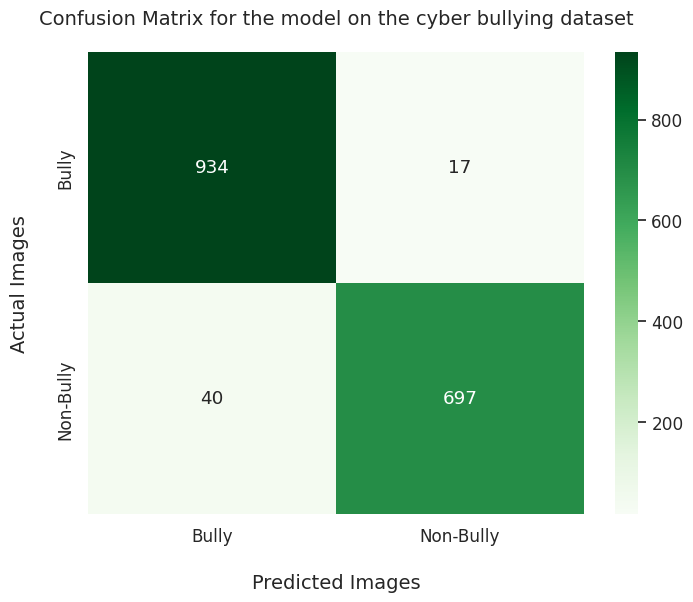

In [18]:
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Greens')
ax.set_xlabel("Predicted Images", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Bully', 'Non-Bully'])
ax.set_ylabel("Actual Images", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Bully', 'Non-Bully'])

# set plot title
ax.set_title("Confusion Matrix for the model on the cyber bullying dataset", fontsize=14, pad=20)

plt.show()